# Error Analysis

This notebook provides functions for conducting error analysis on the results of two models:
1. LinearSVC with the best feature set: `Token`, `POS`, `Chunk`, `Allcaps` and `Cap_after_lower`, which had the best performance metrics out of the systems examined during feature ablation.
2. LinearSVC with combined baseline features (`Token`, `POS`, `Allcaps` and `Cap_after_lower`) and word embeddings, which had the best performance metrics from all systems.

I start by printing a classification report and confusion matrix for each result, and then print out cases where the system annotation did not align with the gold label, and cases where it did. For this purpose, I removed 'O' from the `Gold` column, since it is the majority class, and mostly predicted correctly by the system. I conduct most of the error analysis manually, by opening the CONLL output and looking at neighboring words. I find this the easiest. However, this code allows for selecting candidates for examination.

I did not clear this notebook, since the content is indicative of my work process. But it can be cleared and rerun, of course.

In [1]:
import pandas as pd
import evaluation_util as evaluate

## LinearSVC with best feature set

Evaluation for the SVM model with the best feature combination


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

       B-LOC  0.8243413 0.7877698 0.8056407      1668
      B-MISC  0.8392226 0.6766382 0.7492114       702
       B-ORG  0.7133198 0.6351595 0.6719745      1661
       B-PER  0.7506667 0.6963513 0.7224896      1617
       I-LOC  0.6682692 0.5408560 0.5978495       257
      I-MISC  0.7839506 0.5879630 0.6719577       216
       I-ORG  0.7635379 0.5065868 0.6090713       835
       I-PER  0.6830709 0.9005190 0.7768657      1156
           O  0.0000000 0.0000000 0.0000000         0

    accuracy                      0.7026627      8112
   macro avg  0.6695977 0.5924271 0.6227845      8112
weighted avg  0.7558001 0.7026627 0.7223363      8112



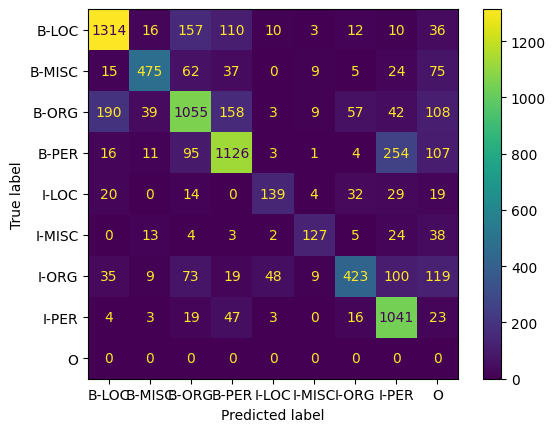

In [2]:
svm_with_best_features = '../data/conll2003.test.output.token_syntax_and_cap_svm.conll'

print("Evaluation for the SVM model with the best feature combination")
evaluate.get_confusion_matrix_and_classification_report(svm_with_best_features,exclude_majority=True)

df = pd.read_csv(svm_with_best_features, sep='\t',
                 names=['Token','POS','Chunk','Gold','Allcaps','Cap_after_Lower',
                        'Demonym','Comp_suf','Poss_mark','System'])

df = df.dropna() # drop rows that contains nan values
df = df[df['Gold'] != 'O'] # to remove category 'O' from evaluation
df = df.drop('Demonym', axis=1)
df = df.drop('Comp_suf', axis=1)
df = df.drop('Poss_mark', axis=1)

### Examine both mismatches and correct annotations

In [3]:
# get insights into discrepancies

token_gold_pairs = list(zip(df['Token'],df['Gold']))

print("System label", "Gold-Token pair",'\n')

for system_label, token_gold_pair in zip(df['System'],token_gold_pairs):
    if system_label != token_gold_pair[1]:
        print(system_label,token_gold_pair)

System label Gold-Token pair 

B-ORG ('JAPAN', 'B-LOC')
I-ORG ('CHINA', 'B-PER')
B-PER ('AL-AIN', 'B-LOC')
I-ORG ('Arab', 'I-LOC')
B-ORG ('Uzbekistan', 'B-LOC')
B-PER ('Uzbek', 'B-MISC')
O ('Igor', 'B-PER')
B-PER ('Uzbekistan', 'B-LOC')
B-ORG ('Hiroshige', 'B-PER')
I-PER ('Hassan', 'B-PER')
O ('Bitar', 'B-PER')
O ('Bitar', 'B-PER')
B-ORG ('Shu', 'B-PER')
B-ORG ('CUTTITTA', 'B-PER')
O ('ITALY', 'B-LOC')
B-PER ('Murrayfield', 'B-LOC')
B-PER ('Twickenham', 'B-LOC')
O ('1995', 'B-MISC')
B-MISC ('World', 'I-MISC')
B-MISC ('Nicola', 'B-PER')
B-ORG ('JAPAN', 'B-LOC')
B-ORG ('SYRIA', 'B-LOC')
B-PER ('AL-AIN', 'B-LOC')
I-ORG ('Arab', 'I-LOC')
I-PER ('Asian', 'B-MISC')
B-ORG ('Salem', 'B-PER')
I-PER ('Hassan', 'B-PER')
O ('Bitar', 'B-PER')
O ('Bitar', 'B-PER')
B-ORG ('Takagi', 'B-PER')
O ('Bitar', 'B-PER')
I-PER ('Kenichi', 'B-PER')
I-PER ('Hiroshige', 'B-PER')
I-PER ('Masami', 'B-PER')
I-PER ('Norio', 'B-PER')
I-PER ('Motohiro', 'B-PER')
I-PER ('Masakiyo', 'B-PER')
I-PER ('Yasuto', 'B-PER')
B-O

In [4]:
# get insights from correct annotations
        
print("System label", "Gold-Token pair",'\n')

for system_label, token_gold_pair in zip(df['System'],token_gold_pairs):
    if system_label == token_gold_pair[1]:
        print(system_label,token_gold_pair)

System label Gold-Token pair 

B-PER ('Nadim', 'B-PER')
I-PER ('Ladki', 'I-PER')
B-LOC ('United', 'B-LOC')
I-LOC ('Emirates', 'I-LOC')
B-LOC ('Japan', 'B-LOC')
B-MISC ('Asian', 'B-MISC')
I-MISC ('Cup', 'I-MISC')
B-LOC ('Syria', 'B-LOC')
B-LOC ('China', 'B-LOC')
B-LOC ('China', 'B-LOC')
I-PER ('Shkvyrin', 'I-PER')
B-MISC ('Chinese', 'B-MISC')
B-PER ('Oleg', 'B-PER')
I-PER ('Shatskiku', 'I-PER')
B-MISC ('Soviet', 'B-MISC')
B-MISC ('Asian', 'B-MISC')
I-MISC ('Cup', 'I-MISC')
B-MISC ('Asian', 'B-MISC')
I-MISC ('Games', 'I-MISC')
B-LOC ('Japan', 'B-LOC')
B-LOC ('Syria', 'B-LOC')
B-PER ('Takuya', 'B-PER')
I-PER ('Takagi', 'I-PER')
I-PER ('Yanagimoto', 'I-PER')
B-MISC ('Syrian', 'B-MISC')
B-PER ('Salem', 'B-PER')
I-PER ('Bitar', 'I-PER')
B-LOC ('Syria', 'B-LOC')
I-PER ('Abbas', 'I-PER')
B-PER ('Nader', 'B-PER')
I-PER ('Jokhadar', 'I-PER')
B-LOC ('Syria', 'B-LOC')
B-LOC ('Japan', 'B-LOC')
B-MISC ('Syrian', 'B-MISC')
B-MISC ('Syrian', 'B-MISC')
B-LOC ('Japan', 'B-LOC')
I-PER ('Kamo', 'I-PER')
B

## LinearSVC with combined baseline features and word embeddings

Evaluation for the the SVM model with the combined baseline features and word embeddings


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

       B-LOC  0.9052571 0.9394484 0.9220359      1668
      B-MISC  0.9471429 0.9444444 0.9457917       702
       B-ORG  0.9170823 0.8856111 0.9010720      1661
       B-PER  0.9412867 0.9319728 0.9366066      1617
       I-LOC  0.8565737 0.8365759 0.8464567       257
      I-MISC  0.9485714 0.7685185 0.8491049       216
       I-ORG  0.9105915 0.7928144 0.8476312       835
       I-PER  0.9096334 0.9230104 0.9162731      1156
           O  0.0000000 0.0000000 0.0000000         0

    accuracy                      0.9021203      8112
   macro avg  0.8151265 0.7802662 0.7961080      8112
weighted avg  0.9192688 0.9021203 0.9098872      8112



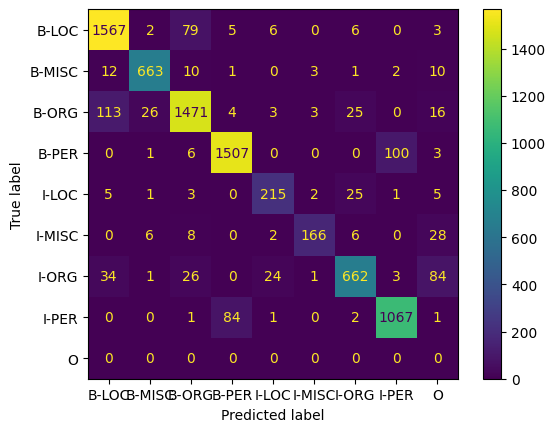

In [5]:
svm_with_combined_baseline_and_embeddings = '../data/conll2003.test.output.combined_features_svm.conll'

print("Evaluation for the the SVM model with the combined baseline features and word embeddings")
evaluate.get_confusion_matrix_and_classification_report(svm_with_combined_baseline_and_embeddings,
                                                        exclude_majority=True)

# construct dataframe from classified test-set

df = pd.read_csv(svm_with_combined_baseline_and_embeddings,sep='\t',
                 names=['Token','POS','Chunk','Gold','Allcaps','Cap_after_Lower',
                        'Demonym','Comp_suf','Poss_mark','System'])

df = df.dropna() # drop rows that contains nan values
df = df[df['Gold'] != 'O'] # to remove category 'O' from evaluation
df = df.drop('Demonym', axis=1)
df = df.drop('Comp_suf', axis=1)
df = df.drop('Poss_mark', axis=1)

### Examine both mismatches and correct annotations

In [6]:
# get insights from discrepancies

token_gold_pairs = list(zip(df['Token'],df['Gold']))

print("System label", "Gold-Token pair",'\n')

for system_label, token_gold_pair in zip(df['System'],token_gold_pairs):
    if system_label != token_gold_pair[1]:
        print(system_label,token_gold_pair)

System label Gold-Token pair 

I-PER ('Cuttitta', 'B-PER')
B-PER ('Coste', 'I-PER')
I-PER ('Cuttitta', 'B-PER')
O ('1995', 'B-MISC')
B-MISC ('World', 'I-MISC')
B-ORG ('Honda', 'I-PER')
I-PER ('Tae', 'B-PER')
I-PER ('Shkvyrin', 'B-PER')
B-PER ('Igor', 'I-PER')
B-PER ('Oleg', 'I-PER')
B-PER ('Mushtaq', 'I-PER')
I-PER ('Kennedy', 'B-PER')
I-PER ('Vaughan', 'B-PER')
I-PER ('Astle', 'B-PER')
B-PER ('Harris', 'I-PER')
B-PER ('Wasim', 'I-PER')
B-PER ('Mushtaq', 'I-PER')
I-MISC ('Cup', 'B-MISC')
O ('Wednesday', 'I-ORG')
O ('Wednesday', 'B-ORG')
B-ORG ('Barcelona', 'B-LOC')
O ("'s", 'I-ORG')
B-LOC ('Moscow', 'I-ORG')
B-LOC ('Moscow', 'I-ORG')
I-PER ('Little', 'B-PER')
B-PER ('Andrew', 'I-PER')
I-ORG ('Town', 'I-LOC')
I-LOC ('Ireland', 'B-LOC')
O ('All', 'B-ORG')
B-PER ('Andrew', 'I-PER')
B-ORG ('Pontypridd', 'B-LOC')
B-ORG ('Leicester', 'B-LOC')
I-LOC ('Ireland', 'B-LOC')
B-LOC ('Zimbabwe', 'B-MISC')
I-ORG ('Club', 'I-LOC')
B-LOC ('South', 'B-MISC')
I-ORG ('Park', 'I-PER')
O ("'", 'I-MISC')
B-O

In [7]:
# get insights from correct annotations
        
print("System label", "Gold-Token pair",'\n')

for system_label, token_gold_pair in zip(df['System'],token_gold_pairs):
    if system_label == token_gold_pair[1]:
        print(system_label,token_gold_pair)

System label Gold-Token pair 

B-LOC ('JAPAN', 'B-LOC')
B-PER ('CHINA', 'B-PER')
B-PER ('Nadim', 'B-PER')
I-PER ('Ladki', 'I-PER')
B-LOC ('AL-AIN', 'B-LOC')
B-LOC ('United', 'B-LOC')
I-LOC ('Arab', 'I-LOC')
I-LOC ('Emirates', 'I-LOC')
B-LOC ('Japan', 'B-LOC')
B-MISC ('Asian', 'B-MISC')
I-MISC ('Cup', 'I-MISC')
B-LOC ('Syria', 'B-LOC')
B-LOC ('China', 'B-LOC')
B-LOC ('Uzbekistan', 'B-LOC')
B-LOC ('China', 'B-LOC')
B-MISC ('Uzbek', 'B-MISC')
B-PER ('Igor', 'B-PER')
I-PER ('Shkvyrin', 'I-PER')
B-MISC ('Chinese', 'B-MISC')
B-PER ('Oleg', 'B-PER')
I-PER ('Shatskiku', 'I-PER')
B-MISC ('Soviet', 'B-MISC')
B-MISC ('Asian', 'B-MISC')
I-MISC ('Cup', 'I-MISC')
B-MISC ('Asian', 'B-MISC')
I-MISC ('Games', 'I-MISC')
B-LOC ('Uzbekistan', 'B-LOC')
B-LOC ('Japan', 'B-LOC')
B-LOC ('Syria', 'B-LOC')
B-PER ('Takuya', 'B-PER')
I-PER ('Takagi', 'I-PER')
B-PER ('Hiroshige', 'B-PER')
I-PER ('Yanagimoto', 'I-PER')
B-MISC ('Syrian', 'B-MISC')
B-PER ('Salem', 'B-PER')
I-PER ('Bitar', 'I-PER')
B-LOC ('Syria', 'B-